Computing p*(epsilon) for -1 <= epsilon <= 1 ...
Done!


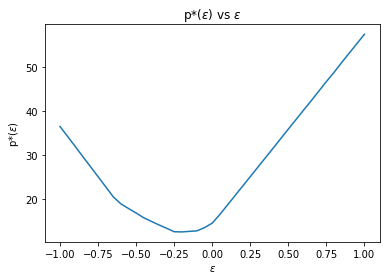

In [2]:
import sys

import cvxopt
import numpy as np
from pylab import *
import math

from cvxpy import *

from multiprocessing import Pool

# Taken from CVX website http://cvxr.com/cvx/examples/
# Exercise 5.33: Parametrized l1-norm approximation
# Ported from cvx matlab to cvxpy by Misrab Faizullah-Khan
# Original comments below

# Boyd & Vandenberghe "Convex Optimization"
# Joelle Skaf - 08/29/05
# (a figure is generated)
#
# Let p_star(epsilon) be the optimal value of the following problem:
#               minimize    ||Ax + b + epsilon*d||_1
# Plots p_star(epsilon) versus epsilon and demonstrates the fact that it's
# affine on an interval that includes epsilon = 0.

# Input data
m = 6
n = 3
A = cvxopt.matrix(
    [-2, 7, 1, -5, -1, 3, -7, 3, -5, -1, 4, -4, 1, 5, 5, 2, -5, -1], (m, n))

b = cvxopt.matrix([-4, 3, 9, 0, -11, 5], (m, 1))
d = cvxopt.matrix([-10, -13, -27, -10, -7, 14], (m, 1))
epsilon = Parameter()

# The problem
x = Variable((n,1))
objective = Minimize(norm(A * x + b + epsilon * d, 1))
p = Problem(objective, [])


# Assign a value to gamma and find the optimal x
def get_p(e_value):
    epsilon.value = e_value
    result = p.solve()
    return result


# Range of epsilon values
e_values = np.linspace(-1, 1, 41)

# Solve serially if desired
# x_values = [get_p(value) for value in e_values]

# Solve in parallel
print('Computing p*(epsilon) for -1 <= epsilon <= 1 ...')
pool = Pool(processes=4)
p_values = pool.map(get_p, e_values)
print('Done!')

# Plots
plot(e_values, p_values)
title('p*($\epsilon$) vs $\epsilon$')
xlabel('$\epsilon$')
ylabel('p*($\epsilon$)')
show()